# Mount Drive



# Importing Libraries and initializing stopwords and stemmer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install texthero
!pip3 install transformers
!pip3 install tensorflow_addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached spacy-2.3.9-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
  Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
  Using cached srsly-1.0.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (209 kB)
  Using cached thinc-7.4.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.6
    Uninstalling srsly-2.4.6:
      Successfully uninstalled srsly-2.4.6
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.9
    Uninstalling thinc-8.1.9:
      Successfully uninstalled thinc-8.1.9
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.1
    Uninstalling spacy-3.5.

In [ ]:
!pip install tweet-preprocessor

import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached spacy-3.5.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
  Using cached thinc-8.1.9-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (922 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached srsly-2.4.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (491 kB)
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.2
    Uninstalling catalogue-1.0.2:
      Successfully uninstalled catalogue-1.0.2
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.6
    Uninstalling srsly-1.0.6:
      Successfully uninstalled srsly-1.0.6
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.6
    Uninstalling thinc-7.4.6:
      Successfully uninstalled thinc-7.4.6
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.9
    Uninstalling spacy-2.3.9:
 

In [ ]:
import re 
import nltk
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob,Word
from nltk.corpus import words
nltk.download('words')
nltk.download('wordnet')
import re
from texthero import stopwords

from nltk.corpus import wordnet #to be learned

import tensorflow as tf

from nltk.corpus import stopwords

import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.9/dist-packages/spacy/util.py:887: UserWarning: [W095] Model 'en_core_web_sm' (3.4.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.5.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import texthero as hero 

In [ ]:
def lemma_per_pos(text):
    '''function to lemmatize according to part of speech tag'''
    lemmatizer = nltk.stem.WordNetLemmatizer()
    text=text.lower()
    text = [word for word in text.split(" ")]
    text= [lemmatizer.lemmatize(token, "v") for token in text] #Lemmatization
    return " ".join(text)

def df_preprocessing(df,feature_col):
    '''
    Preprocessing of dataframe
    '''
    stop = set(stopwords.words('english'))
    df[feature_col]= (df[feature_col].pipe(hero.lowercase).
                      pipe(hero.remove_urls).
                      pipe(hero.remove_digits).
                      pipe(hero.remove_punctuation).
                      pipe(hero.remove_html_tags) )
    # lemmatization
    df[feature_col]= [lemma_per_pos(sent) for sent in df[feature_col]]
    #df[col_name]= hero.remove_stopwords(df[col_name],custom_stopwords)
    return df

In [ ]:
from transformers import AutoTokenizer,TFDistilBertModel, DistilBertConfig
from transformers import TFAutoModel
import tensorflow as tf 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from transformers import AdamW, get_linear_schedule_with_warmup
import tensorflow_addons as tfa

# Reading Data


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/capstone/data/fake reviews dataset.csv") #Your respective address 
data.head()
## change data

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


## ONE HOT ENCODING CLASS LABELS

In [ ]:
def one_hot(data):
  column_names = ["text","Fake","Real"]
  test_df = pd.DataFrame(columns = column_names)

  for i in range(len(data)):
    text_temp = data['text_'].iloc[i]
    if data['label'].iloc[i] == "CG":
      test_df.loc[i] = [text_temp,1,0]
    elif data['label'].iloc[i] == "OR":
      test_df.loc[i] = [text_temp,0,1]
  return test_df


In [ ]:
with tf.device('/GPU:0'): 
  data1=one_hot(data[['text_',"label"]])

In [ ]:
data1

,text,Fake,Real
0,"Love this! Well made, sturdy, and very comfor...",1,0
1,"love it, a great upgrade from the original. I...",1,0
2,This pillow saved my back. I love the look and...,1,0
3,"Missing information on how to use it, but it i...",1,0
4,Very nice set. Good quality. We have had the s...,1,0
...,...,...,...
40427,I had read some reviews saying that this bra r...,0,1
40428,I wasn't sure exactly what it would be. It is ...,1,0
40429,"You can wear the hood by itself, wear it with ...",0,1
40430,I liked nothing about this dress. The only rea...,1,0


In [ ]:
target_col= data1.columns[1:]
feature_col=data1.columns[0:1]

#Preprocessing

In [ ]:
target_col,feature_col

(Index(['Fake', 'Real'], dtype='object'), Index(['text'], dtype='object'))

### preprocessing training and testing data

In [ ]:
with tf.device('/GPU:0'): 
  data_prp= df_preprocessing(data1,feature_col[0])

In [ ]:
#Creating tokenizer
def create_tokenizer(pretrained_weights='distilbert-base-uncased'):
  '''Function to create the tokenizer'''

  tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)
  return tokenizer

#Tokenization of the data
def data_tokenization(dataset,max_len,tokenizer):
    '''dataset: Pandas dataframe with feature name is column name 
    Pretrained_weights: selected model 
    RETURN: [input_ids, attention_mask]'''

    tokens = dataset.apply(lambda x: tokenizer(x,return_tensors='tf', 
                                                            truncation=True,
                                                            padding='max_length',
                                                            max_length=max_len, 
                                                            add_special_tokens=True))
    input_ids= []
    attention_mask=[]
    for item in tokens:
        input_ids.append(item['input_ids'])
        attention_mask.append(item['attention_mask'])
    input_ids, attention_mask=np.squeeze(input_ids), np.squeeze(attention_mask)


    return [input_ids,attention_mask]

#Model 

In [ ]:
def distilbert_model(pretrained_weights,max_len,learning_rate):
  '''BERT model creation with pretrained weights
  INPUT:
  pretrained_weights: Language model pretrained weights
  max_len: input length '''
  print('Model selected:', pretrained_weights)
  bert=TFAutoModel.from_pretrained(pretrained_weights)
  
  # This is must if you would like to train the layers of language models too.
  for layer in bert.layers:
      layer.trainable = True

  # # parameter declaration
  # step = tf.Variable(0, trainable=False)
  # schedule = tf.optimizers.schedules.PiecewiseConstantDecay([10000, 15000], [2e-0, 2e-1, 1e-2])
  # # lr and wd can be a function or a tensor
  # lr = learning_rate * schedule(step)
  # wd = lambda:lr * schedule(step)
  # optimizer = tfa.optimizers.AdamW(learning_rate=lr, weight_decay=wd)

  # optimizer= tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')
  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)

  # declaring inputs, BERT take input_ids and attention_mask as input
  input_ids= Input(shape=(max_len,),dtype=tf.int32,name='input_ids')
  attention_mask=Input(shape=(max_len,),dtype=tf.int32,name='attention_mask')

  bert= bert(input_ids,attention_mask=attention_mask)
  x= bert[0][:,0,:]
  x=tf.keras.layers.Dropout(0.05)(x)
  # x= tf.keras.layers.Dense(128)(x)
  #x=tf.keras.layers.Dense(64)(x)
  #x=tf.keras.layers.Dense(32)(x)

  output=tf.keras.layers.Dense(2,activation='sigmoid')(x)

  model=Model(inputs=[input_ids,attention_mask],outputs=[output])
  # compiling model 
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE,name='categorical_crossentropy'),
                metrics=['accuracy'])
  return model

In [ ]:
pretrained_weights='microsoft/deberta-base'
max_len=256
epochs=3
learning_rate=2e-5
batch_size= 16

In [ ]:
tokenizer= create_tokenizer(pretrained_weights)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_prp['text'], data_prp[['Fake','Real']], test_size=0.3, random_state=1,shuffle =True)

In [ ]:
x_train= data_tokenization(X_train,max_len,tokenizer) 

In [ ]:
y_train= y_train[target_col].values
y_train = y_train.astype('int32')
y_train

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int32)

In [ ]:
y_train.shape

(28302, 2)

In [ ]:
distilbert=distilbert_model(pretrained_weights,max_len,learning_rate)
distilbert.summary()

Model selected: microsoft/deberta-base


All model checkpoint layers were used when initializing TFDebertaModel.

All the layers of TFDebertaModel were initialized from the model checkpoint at microsoft/deberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDebertaModel for predictions without further training.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 tf_deberta_model (TFDebertaMod  TFBaseModelOutput(l  138601728  ['input_ids[0][0]',              
 el)                            ast_hidden_state=(N               'attention_mask[0][0]']         
                                one, 256, 768),                                                   
                                 hidden_states=None                                           

In [ ]:
with tf.device('/GPU:0'):
    distilbert.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/3


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1769/1769 [==============================] - 2489s 1s/step - loss: 0.2117 - accuracy: 0.9057
Epoch 2/3
1769/1769 [==============================] - 2375s 1s/step - loss: 0.0684 - accuracy: 0.9764
Epoch 3/3
1769/1769 [==============================] - 2373s 1s/step - loss: 0.0374 - accuracy: 0.9863


## tokenizing test data

In [ ]:
x_test= data_tokenization(X_test,max_len,tokenizer)
x_test

[array([[    1,  3463, 39462, ...,     0,     0,     0],
        [    1,   118,   269, ...,     0,     0,     0],
        [    1,   118,   657, ...,     0,     0,     0],
        ...,
        [    1,   118,   657, ...,     0,     0,     0],
        [    1,  3746,    42, ...,     0,     0,     0],
        [    1,   118,   218, ...,     0,     0,     0]], dtype=int32),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)]

In [ ]:
preds= distilbert.predict(x_test)

380/380 [==============================] - 281s 723ms/step


In [ ]:
preds.shape
predicted_test_labels=pd.DataFrame(preds)

In [ ]:
predicted_test_labels

,0,1
0,0.999418,0.000934
1,0.001338,0.999521
2,0.998955,0.001674
3,0.956994,0.071229
4,0.422803,0.721334
...,...,...
12125,0.999713,0.000446
12126,0.149260,0.922477
12127,0.009770,0.996062
12128,0.000384,0.999877


In [ ]:
predicted_test_labels.columns=["Fake","Real"]

In [ ]:
pred_labels=[]
for i in range(predicted_test_labels.shape[0]):
  temp = max(predicted_test_labels['Fake'].iloc[i],predicted_test_labels['Real'].iloc[i])
  if temp == predicted_test_labels['Fake'].iloc[i]:
    pred_labels.append('Fake')
  elif temp == predicted_test_labels['Real'].iloc[i]:
    pred_labels.append('Real')

In [ ]:
true_labels = y_test.apply(lambda x: 'Fake' if x['Fake'] == 1 else 'Real', axis=1)
#true_labels = true_labels.replace({'Fake': 1, 'Real': 0})

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
true_labels=list(true_labels)

## performance on hasoc test data 

In [ ]:
print(classification_report(true_labels,pred_labels))

              precision    recall  f1-score   support

        Fake       0.94      0.99      0.97      6107
        Real       0.99      0.94      0.96      6023

    accuracy                           0.96     12130
   macro avg       0.97      0.96      0.96     12130
weighted avg       0.97      0.96      0.96     12130



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

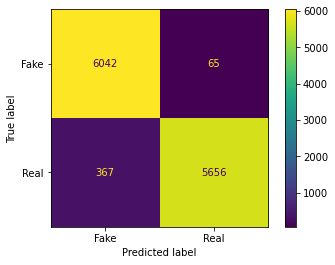

In [ ]:
cm = confusion_matrix(true_labels, pred_labels, labels=["Fake","Real"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Fake","Real"])
disp.plot()
plt.show()